# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

<div align="right"><font color="blue" size="5">Your Score was 76.0 out of a total of 100.0, or 76.0%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.


### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers. This is especially important for the textual description and probability output (below).

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plotter
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

**Step 1: Reading the data and extracting the relevant columns**

In [2]:
pd.set_option('display.max_columns', 520)
train_C_DataPath = os.path.join(os.getcwd(),'datasets','Images_C_Train.csv')
validation_C_DataPath = os.path.join(os.getcwd(),'datasets','Images_C_Validate.csv')
test_C_DataPath = os.path.join(os.getcwd(),'datasets','Images_C_Test.csv')
train_C = pd.read_csv(train_C_DataPath)
validation_C = pd.read_csv(validation_C_DataPath) 
test_C = pd.read_csv(test_C_DataPath)
print('Dimensions of training set are: ',train_C.shape)
print('Dimensions of validation set are: ',validation_C.shape)
print('Dimensions of test set are: ',test_C.shape)
attribute_list = list(train_C.columns[1:501])
attribute_list.append('is_person')
# extracting only the relevant features and class labels from the data set
train_C = train_C[attribute_list]
validation_C = validation_C[attribute_list]
# splitting the data sets into features any class labels
X_train = train_C.drop('is_person',inplace=False,axis=1)
y_train = train_C['is_person']
X_validation = validation_C.drop('is_person',inplace=False,axis=1)
y_validation = validation_C['is_person']
X_test_features  = test_C.drop('is_person',inplace=False,axis=1)
print('Dimensions of training feature set are: ',X_train.shape)
print('Dimensions of training class labels are: ',y_train.shape)
print('Dimensions of validation feature set are: ',X_validation.shape)
print('Dimensions of validation class labels are: ',y_validation.shape)
print('Dimensions of testing feature set are: ',X_test_features.shape)

Dimensions of training set are:  (2113, 520)
Dimensions of validation set are:  (1113, 520)
Dimensions of test set are:  (1114, 501)
Dimensions of training feature set are:  (2113, 500)
Dimensions of training class labels are:  (2113,)
Dimensions of validation feature set are:  (1113, 500)
Dimensions of validation class labels are:  (1113,)
Dimensions of testing feature set are:  (1114, 500)


**Step 2: Investigating the training set and validation set**

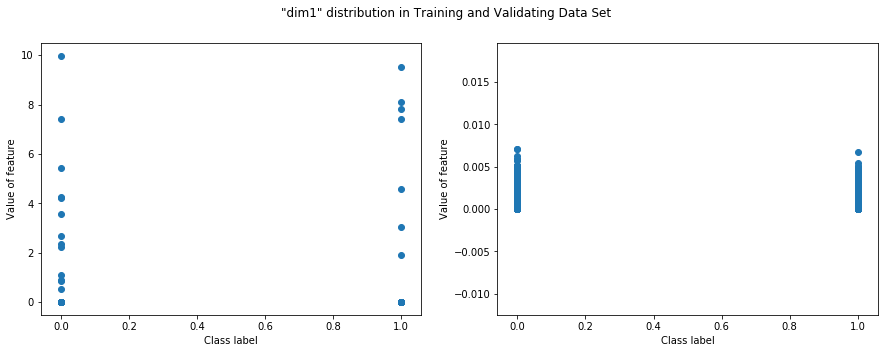

In [20]:
fig = plt.subplots(1,2,figsize=(15,5), sharex=False, sharey = False)

plt.subplot(1,2,1)
ax1 = plt.scatter(y_train,X_train['dim1'])
plt.xlabel('Class label')
plt.ylabel('Value of feature')

plt.subplot(1,2,2)
plt.scatter(y_validation,X_validation['dim1'])
plt.xlabel('Class label')
plt.ylabel('Value of feature')

plt.suptitle('"dim1" distribution in Training and Validating Data Set')

plt.show()


# plt.scatter(y_train,X_train['dim1'])
# plt.scatter(y_validation,X_validation['dim1'])
# # plt.scatter(y_train,X_train['dim2'])
# # plt.scatter(y_train,X_train['dim500'])
# plt.xlabel('Class label')
# plt.ylabel('Value of feature')
# plt.show()

In [49]:
X_train.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.050306,0.052482,0.044370,0.046100,0.043218,0.049724,0.050818,0.038214,0.050150,0.051801
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.561111,0.616955,0.466802,0.528117,0.508790,0.561206,0.562799,0.437885,0.581028,0.569857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.001019,0.000000,0.000679,0.000679,0.001764,0.001019,0.000744,0.001116,0.001019,0.001019
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.001860,0.000000,0.002717,0.001359,0.003125,0.001953,0.002038,0.002038,0.002038,0.002268
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.003005,0.000679,0.006641,0.002232,0.004883,0.003057,0.004076,0.003057,0.003397,0.004076
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,9.922150,9.673318,7.375434,9.672255,9.348755,9.299061,9.951019,9.036268,9.963328,9.505755


In [154]:
X_validation.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,dim11,dim12,dim13,dim14,dim15,dim16,dim17,dim18,dim19,dim20,dim21,dim22,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32,dim33,dim34,dim35,dim36,dim37,dim38,dim39,dim40,dim41,dim42,dim43,dim44,dim45,dim46,dim47,dim48,dim49,dim50,dim51,dim52,dim53,dim54,dim55,dim56,dim57,dim58,dim59,dim60,dim61,dim62,dim63,dim64,dim65,dim66,dim67,dim68,dim69,dim70,dim71,dim72,dim73,dim74,dim75,dim76,dim77,dim78,dim79,dim80,dim81,dim82,dim83,dim84,dim85,dim86,dim87,dim88,dim89,dim90,dim91,dim92,dim93,dim94,dim95,dim96,dim97,dim98,dim99,dim100,dim101,dim102,dim103,dim104,dim105,dim106,dim107,dim108,dim109,dim110,dim111,dim112,dim113,dim114,dim115,dim116,dim117,dim118,dim119,dim120,dim121,dim122,dim123,dim124,dim125,dim126,dim127,dim128,dim129,dim130,dim131,dim132,dim133,dim134,dim135,dim136,dim137,dim138,dim139,dim140,dim141,dim142,dim143,dim144,dim145,dim146,dim147,dim148,dim149,dim150,dim151,dim152,dim153,dim154,dim155,dim156,dim157,dim158,dim159,dim160,dim161,dim162,dim163,dim164,dim165,dim166,dim167,dim168,dim169,dim170,dim171,dim172,dim173,dim174,dim175,dim176,dim177,dim178,dim179,dim180,dim181,dim182,dim183,dim184,dim185,dim186,dim187,dim188,dim189,dim190,dim191,dim192,dim193,dim194,dim195,dim196,dim197,dim198,dim199,dim200,dim201,dim202,dim203,dim204,dim205,dim206,dim207,dim208,dim209,dim210,dim211,dim212,dim213,dim214,dim215,dim216,dim217,dim218,dim219,dim220,dim221,dim222,dim223,dim224,dim225,dim226,dim227,dim228,dim229,dim230,dim231,dim232,dim233,dim234,dim235,dim236,dim237,dim238,dim239,dim240,dim241,dim242,dim243,dim244,dim245,dim246,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256,dim257,dim258,dim259,dim260,dim261,dim262,dim263,dim264,dim265,dim266,dim267,dim268,dim269,dim270,dim271,dim272,dim273,dim274,dim275,dim276,dim277,dim278,dim279,dim280,dim281,dim282,dim283,dim284,dim285,dim286,dim287,dim288,dim289,dim290,dim291,dim292,dim293,dim294,dim295,dim296,dim297,dim298,dim299,dim300,dim301,dim302,dim303,dim304,dim305,dim306,dim307,dim308,dim309,dim310,dim311,dim312,dim313,dim314,dim315,dim316,dim317,dim318,dim319,dim320,dim321,dim322,dim323,dim324,dim325,dim326,dim327,dim328,dim329,dim330,dim331,dim332,dim333,dim334,dim335,dim336,dim337,dim338,dim339,dim340,dim341,dim342,dim343,dim344,dim345,dim346,dim347,dim348,dim349,dim350,dim351,dim352,dim353,dim354,dim355,dim356,dim357,dim358,dim359,dim360,dim361,dim362,dim363,dim364,dim365,dim366,dim367,dim368,dim369,dim370,dim371,dim372,dim373,dim374,dim375,dim376,dim377,dim378,dim379,dim380,dim381,dim382,dim383,dim384,dim385,dim386,dim387,dim388,dim389,dim390,dim391,dim392,dim393,dim394,dim395,dim396,dim397,dim398,dim399,dim400,dim401,dim402,dim403,dim404,dim405,dim406,dim407,dim408,dim409,dim410,dim411,dim412,dim413,dim414,dim415,dim416,dim417,dim418,dim419,dim420,dim421,dim422,dim423,dim424,dim425,dim426,dim427,dim428,dim429,dim430,dim431,dim432,dim433,dim434,dim435,dim436,dim437,dim438,dim439,dim440,dim441,dim442,dim443,dim444,dim445,dim446,dim447,dim448,dim449,dim450,dim451,dim452,dim453,dim454,dim455,dim456,dim457,dim458,dim459,dim460,dim461,dim462,dim463,dim464,dim465,dim466,dim467,dim468,dim469,dim470,dim471,dim472,dim473,dim474,dim475,dim476,dim477,dim478,dim479,dim480,dim481,dim482,dim483,dim484,dim485,dim486,dim487,dim488,dim489,dim490,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1

**Step 3: Removing the outliers and stardarizing the features in the data set**

In [3]:
# Removing attributes which have constant values and hence zero ranges (dimensionality reduction)
redundant_attribute_training = []
for item in attribute_list:
    if(item == 'is_person'):
        continue
    if (X_train[item].max() == X_train[item].min()):
        redundant_attribute_training.append(item)
print('Redundant attributes (zero range attributes) in training set: ')
print(redundant_attribute_training)
if (len(redundant_attribute_training) == 0):
    print('No Redundant attributes detected in training set')
    
    
# Removing the outliers (numerosity reduction)
print('*' * 5,'Removing outliers','*' * 5)
print('Number of data points without removing outliers are: ',X_train.shape[0])
ctr = 0
outlier_datapoints = []
X_train_clean = X_train.copy()
outlier_indices = []
for attribute in attribute_list:
    if(attribute == 'is_person'):
        continue
    mean = X_train_clean[attribute].mean() # computing the mean for an attribute
    std = X_train_clean[attribute].std() # computing the standard deviation for attribute
    for i,value in enumerate(X_train_clean[attribute]): 
        if (np.abs(value - mean) > ( 2 * std)): # Checking if the value in attribute is 2 times further from mean
            outlier_indices.append(i)
            
outlier_indices = list(set(outlier_indices))
X_train_clean.drop(outlier_indices, inplace = True, axis=0)
y_train_clean =  y_train.copy()
y_train_clean.drop(outlier_indices, inplace = True, axis=0)
print('Number of data points after removing outliers are: ',X_train_clean.shape[0])
# print('Number of data points after removing outliers are: ',y_train_clean.shape[0])
X_train_clean.describe()

Redundant attributes (zero range attributes) in training set: 
[]
No Redundant attributes detected in training set
***** Removing outliers *****
Number of data points without removing outliers are:  2113
Number of data points after removing outliers are:  2093


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,dim11,dim12,dim13,dim14,dim15,dim16,dim17,dim18,dim19,dim20,dim21,dim22,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32,dim33,dim34,dim35,dim36,dim37,dim38,dim39,dim40,dim41,dim42,dim43,dim44,dim45,dim46,dim47,dim48,dim49,dim50,dim51,dim52,dim53,dim54,dim55,dim56,dim57,dim58,dim59,dim60,dim61,dim62,dim63,dim64,dim65,dim66,dim67,dim68,dim69,dim70,dim71,dim72,dim73,dim74,dim75,dim76,dim77,dim78,dim79,dim80,dim81,dim82,dim83,dim84,dim85,dim86,dim87,dim88,dim89,dim90,dim91,dim92,dim93,dim94,dim95,dim96,dim97,dim98,dim99,dim100,dim101,dim102,dim103,dim104,dim105,dim106,dim107,dim108,dim109,dim110,dim111,dim112,dim113,dim114,dim115,dim116,dim117,dim118,dim119,dim120,dim121,dim122,dim123,dim124,dim125,dim126,dim127,dim128,dim129,dim130,dim131,dim132,dim133,dim134,dim135,dim136,dim137,dim138,dim139,dim140,dim141,dim142,dim143,dim144,dim145,dim146,dim147,dim148,dim149,dim150,dim151,dim152,dim153,dim154,dim155,dim156,dim157,dim158,dim159,dim160,dim161,dim162,dim163,dim164,dim165,dim166,dim167,dim168,dim169,dim170,dim171,dim172,dim173,dim174,dim175,dim176,dim177,dim178,dim179,dim180,dim181,dim182,dim183,dim184,dim185,dim186,dim187,dim188,dim189,dim190,dim191,dim192,dim193,dim194,dim195,dim196,dim197,dim198,dim199,dim200,dim201,dim202,dim203,dim204,dim205,dim206,dim207,dim208,dim209,dim210,dim211,dim212,dim213,dim214,dim215,dim216,dim217,dim218,dim219,dim220,dim221,dim222,dim223,dim224,dim225,dim226,dim227,dim228,dim229,dim230,dim231,dim232,dim233,dim234,dim235,dim236,dim237,dim238,dim239,dim240,dim241,dim242,dim243,dim244,dim245,dim246,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256,dim257,dim258,dim259,dim260,dim261,dim262,dim263,dim264,dim265,dim266,dim267,dim268,dim269,dim270,dim271,dim272,dim273,dim274,dim275,dim276,dim277,dim278,dim279,dim280,dim281,dim282,dim283,dim284,dim285,dim286,dim287,dim288,dim289,dim290,dim291,dim292,dim293,dim294,dim295,dim296,dim297,dim298,dim299,dim300,dim301,dim302,dim303,dim304,dim305,dim306,dim307,dim308,dim309,dim310,dim311,dim312,dim313,dim314,dim315,dim316,dim317,dim318,dim319,dim320,dim321,dim322,dim323,dim324,dim325,dim326,dim327,dim328,dim329,dim330,dim331,dim332,dim333,dim334,dim335,dim336,dim337,dim338,dim339,dim340,dim341,dim342,dim343,dim344,dim345,dim346,dim347,dim348,dim349,dim350,dim351,dim352,dim353,dim354,dim355,dim356,dim357,dim358,dim359,dim360,dim361,dim362,dim363,dim364,dim365,dim366,dim367,dim368,dim369,dim370,dim371,dim372,dim373,dim374,dim375,dim376,dim377,dim378,dim379,dim380,dim381,dim382,dim383,dim384,dim385,dim386,dim387,dim388,dim389,dim390,dim391,dim392,dim393,dim394,dim395,dim396,dim397,dim398,dim399,dim400,dim401,dim402,dim403,dim404,dim405,dim406,dim407,dim408,dim409,dim410,dim411,dim412,dim413,dim414,dim415,dim416,dim417,dim418,dim419,dim420,dim421,dim422,dim423,dim424,dim425,dim426,dim427,dim428,dim429,dim430,dim431,dim432,dim433,dim434,dim435,dim436,dim437,dim438,dim439,dim440,dim441,dim442,dim443,dim444,dim445,dim446,dim447,dim448,dim449,dim450,dim451,dim452,dim453,dim454,dim455,dim456,dim457,dim458,dim459,dim460,dim461,dim462,dim463,dim464,dim465,dim466,dim467,dim468,dim469,dim470,dim471,dim472,dim473,dim474,dim475,dim476,dim477,dim478,dim479,dim480,dim481,dim482,dim483,dim484,dim485,dim486,dim487,dim488,dim489,dim490,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2

In [4]:
# Standardizing the features for training, validation and test set
scaler = StandardScaler()
scaler.fit(X_train_clean)
X_train_scaled = scaler.transform(X_train_clean) 
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test_features)   

**Step 4: Obtaining a baseline classification accuracy**

In [7]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_scaled,y_train)
print('The dummy classifier has an accuracy of ',round(dummy.score(X_validation_scaled,y_validation),3),' on the validation data set')

The dummy classifier has an accuracy of  0.527  on the validation data set


**Step 5: Obatining classification accuracy for the following classifiers** 
1. Logistic Regression
2. Random Forest Classifier
3. SVM (with radial basis kernel)
4. Various Combinations of Voting Classifiers

**1. Logistic Regression**

**Default Configurations**

In [9]:
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train_scaled,y_train_clean)
accuracy = logistic_regression.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation, logistic_regression.predict_proba(X_validation_scaled))
print('The accuracy of the default logistic regression is: ',round(accuracy,3))
print('The log loss value of the default logistic regression is: ',round(logloss,3))

The accuracy of the default logistic regression is:  0.643
The log loss value of the default logistic regression is:  0.835


**Optimal Configurations**

In [10]:
logistic_regression = LogisticRegression(solver='lbfgs')
num_of_folds = 5
num_interval = 100
num = num_interval
cvgen = KFold(n_splits=num_of_folds, shuffle=True, random_state=0) # A 5 fold split object cross validation generator
c_candidates = {
    'C': np.logspace(-10, 10, num=num_interval, base=10),
}
grid = GridSearchCV(logistic_regression, param_grid=c_candidates,scoring='neg_log_loss',cv=cvgen) 
grid.fit(X_train_scaled, y_train_clean)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-10, 1.59228e-10, ..., 6.28029e+09, 1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [11]:
print('The optimal values are')
print(grid.best_params_)
logistic_regression_optimal = LogisticRegression(solver='lbfgs', C=grid.best_params_['C'])
logistic_regression_optimal.fit(X_train_scaled,y_train_clean)
accuracy = logistic_regression_optimal.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation, logistic_regression_optimal.predict_proba(X_validation_scaled))
print('The accuracy of the optimal logistic regression is: ',round(accuracy,3))
print('The log loss value of the optimal logistic regression is: ',round(logloss,3))

The optimal values are
{'C': 0.0029836472402833404}
The accuracy of the optimal logistic regression is:  0.696
The log loss value of the optimal logistic regression is:  0.581


**2. Random Forest classifier**

**Default Configurations**

In [12]:
randomForest = RandomForestClassifier(n_estimators=500,random_state=42,criterion="entropy")
randomForest.fit(X_train_scaled,y_train_clean)
accuracy = randomForest.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation, randomForest.predict_proba(X_validation_scaled))
print('The accuracy of the default random forest classifier is: ',round(accuracy,3))
print('The log loss value of the default random forest classifier is: ',round(logloss,3))

The accuracy of the default random forest classifier is:  0.698
The log loss value of the default random forest classifier is:  0.584


**Optimal Configurations**

In [14]:
randomForest = RandomForestClassifier(n_estimators=200,random_state=42)
optimizing_parameters = {
    "criterion": ["entropy","gini"],
    "max_depth": [4,None],
    "max_leaf_nodes": [5,None],
    "max_features": ["auto","sqrt","log2",None]
}
grid_search = GridSearchCV(randomForest, param_grid=optimizing_parameters,scoring='neg_log_loss',cv=cvgen) # A 5 fold split object cross validation generator
grid_search.fit(X_train_scaled, y_train_clean)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [4, None], 'max_leaf_nodes': [5, None], 'max_features': ['auto', 'sqrt', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [15]:
print('The optimal values are')
print(grid_search.best_params_)
randomForest_optimal = RandomForestClassifier(n_estimators=200,random_state=42,
                                              criterion='entropy',max_depth=None,max_features=None,max_leaf_nodes=None)
randomForest_optimal.fit(X_train_scaled,y_train_clean)
accuracy = randomForest_optimal.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation, randomForest_optimal.predict_proba(X_validation_scaled))
print('The accuracy of the optimal random forest classifier is: ',round(accuracy,3))
print('The log loss value of the optimal random forest classifier is: ',round(logloss,3))

The optimal values are
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None}
The accuracy of the optimal random forest classifier is:  0.69
The log loss value of the optimal random forest classifier is:  0.578


**3. Support Vector Classification**

**Default Configurations**

In [16]:
rbfKernel = SVC(kernel='rbf', probability=True)
rbfKernel.fit(X_train_scaled,y_train_clean)
accuracy = rbfKernel.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation, rbfKernel.predict_proba(X_validation_scaled))
print('The accuracy of the default SVC with rbf kernel classifier is: ',round(accuracy,3))
print('The log loss value of the default SVC with rbf kernel classifier is: ',round(logloss,3))

The accuracy of the default SVC with rbf kernel classifier is:  0.73
The log loss value of the default SVC with rbf kernel classifier is:  0.542


**Optimal Configurations**

In [17]:
rbfKernel = SVC(kernel='rbf',probability=True)
num_interval = 10
gamma_list = list(np.logspace(-10, 10, num=num_interval, base=10))
gamma_list.append('auto')
optimizing_parameters = {
    "C" : np.logspace(-10, 10, num=num_interval, base=10),
    "gamma" : gamma_list
}
grid_search_2 = GridSearchCV(rbfKernel, param_grid=optimizing_parameters,scoring='neg_log_loss',cv=cvgen)
grid_search_2.fit(X_train_scaled, y_train_clean)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-10, 1.66810e-08, 2.78256e-06, 4.64159e-04, 7.74264e-02,
       1.29155e+01, 2.15443e+03, 3.59381e+05, 5.99484e+07, 1.00000e+10]), 'gamma': [1e-10, 1.6681005372000592e-08, 2.782559402207126e-06, 0.0004641588833612782, 0.07742636826811278, 12.915496650148826, 2154.4346900318865, 359381.36638046405, 59948425.03189421, 10000000000.0, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [18]:
print('The optimal values are')
print(grid_search_2.best_params_)
c = grid_search_2.best_params_['C']
gamma = grid_search_2.best_params_['gamma']
rbfKernel_optimal = SVC(kernel='rbf', probability=True, C=c, gamma=gamma)
rbfKernel_optimal.fit(X_train_scaled,y_train_clean)
accuracy = rbfKernel_optimal.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation, rbfKernel_optimal.predict_proba(X_validation_scaled))
print('The accuracy of the optimal SVC with rbf kernel classifier is: ',round(accuracy,3))
print('The log loss value of the optimal SVC with rbf kernel classifier is: ',round(logloss,3))

The optimal values are
{'C': 10000000000.0, 'gamma': 'auto'}
The accuracy of the optimal SVC with rbf kernel classifier is:  0.712
The log loss value of the optimal SVC with rbf kernel classifier is:  0.552


**4. Voting Classifiers**

**4.1 Voting classifier with default configurations of estimators**

**4.1.1 Voting classifier with LogisticRegression and  RandomForestClassifier**

In [38]:
model_mixed_1 = [('logistic',LogisticRegression(solver='lbfgs')),
               ('forest',RandomForestClassifier(n_estimators=500,random_state=42,criterion="entropy"))]
voter = VotingClassifier(estimators=model_mixed_1,voting='soft',weights=[1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.659
The log loss value of the classifier is:  0.59


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**4.1.2 Voting classifier with LogisticRegression and  SVC**

In [44]:
model_mixed_2 = [('logistic',LogisticRegression(solver='lbfgs')),
                ('SVC',SVC(kernel='rbf', probability=True))]
voter = VotingClassifier(estimators=model_mixed_2,voting='soft',weights=[1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.67
The log loss value of the classifier is:  0.588


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**4.1.3 Voting classifier with RandomForestClassifier and  SVC**

In [42]:
model_mixed_3 = [('forest',RandomForestClassifier(n_estimators=500,random_state=42,criterion="entropy")),
                ('SVC',SVC(kernel='rbf', probability=True))]
voter = VotingClassifier(estimators=model_mixed_3,voting='soft',weights=[1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.721
The log loss value of the classifier is:  0.553


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**4.1.4 Voting classifier with LogisticRegression, RandomForestClassifier and  SVC**

In [45]:
model_mixed_4 = [('logistic',LogisticRegression(solver='lbfgs')),
               ('forest',RandomForestClassifier(n_estimators=500,random_state=42,criterion="entropy")),
                ('SVC',SVC(kernel='rbf', probability=True))]
voter = VotingClassifier(estimators=model_mixed_4,voting='soft',weights=[1,1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.69
The log loss value of the classifier is:  0.565


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**4.2 Voting classifier with the optimal configuration parameters of estimators**

**4.2.1 Voting classifier with LogisticRegression and  RandomForestClassifier**

In [47]:
model_mixed_1 = [('logistic',LogisticRegression(solver='lbfgs',C=grid.best_params_['C'],random_state=0)),
               ('forest',RandomForestClassifier(n_estimators=200,random_state=42,
                                criterion='entropy',max_depth=None,max_features=None,max_leaf_nodes=None))]
voter = VotingClassifier(estimators=model_mixed_1,voting='soft',weights=[1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.702
The log loss value of the classifier is:  0.569


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**4.2.2 Voting classifier with LogisticRegression and  SVC**

In [34]:
model_mixed_2 = [('logistic',LogisticRegression(solver='lbfgs',C=grid.best_params_['C'],random_state=0)),
                 ('svc',SVC(kernel='rbf', probability=True, C=grid_search_2.best_params_['C'], 
                          gamma=grid_search_2.best_params_['gamma']))]
voter = VotingClassifier(estimators=model_mixed_2,voting='soft',weights=[1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.71
The log loss value of the classifier is:  0.555


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**4.2.3 Voting classifier with SVC and RandomForestClassifier**

In [35]:
model_mixed_3 = [('svc',SVC(kernel='rbf', probability=True, C=grid_search_2.best_params_['C'], 
                            gamma=grid_search_2.best_params_['gamma'])),
                 ('forest',RandomForestClassifier(n_estimators=200,random_state=42,
                                criterion='entropy',max_depth=None,max_features=None,max_leaf_nodes=None))]
voter = VotingClassifier(estimators=model_mixed_3,voting='soft',weights=[1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.714
The log loss value of the classifier is:  0.553


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**4.2.4 Voting classifier with SVC, RandomForestClassifier and LogisticRegression**

In [36]:
model_mixed_4 = [('svc',SVC(kernel='rbf', probability=True, C=grid_search_2.best_params_['C'], 
                            gamma=grid_search_2.best_params_['gamma'])),
                 ('forest',RandomForestClassifier(n_estimators=200,random_state=42,
                                criterion='entropy',max_depth=None,max_features=None,max_leaf_nodes=None)),
                 ('logistic',LogisticRegression(solver='lbfgs',C=grid.best_params_['C'],random_state=0))]
voter = VotingClassifier(estimators=model_mixed_4,voting='soft',weights=[1,1,1])
voter.fit(X_train_scaled,y_train_clean)
voter_prob = voter.predict_proba(X_validation_scaled)
accuracy = voter.score(X_validation_scaled,y_validation)
logloss = log_loss(y_validation,voter_prob)
print('The accuracy of the classifier is: ',round(accuracy,3))
print('The log loss value of the classifier is: ',round(logloss,3))

The accuracy of the classifier is:  0.708
The log loss value of the classifier is:  0.554


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#ANSWER_TEXT#

# Pre-processing the data 

The test data was first read from the dataset and analyzed for outliers. Two scatter plots were then plotted showing the distribution of the values of the feature "dim1" (an arbitrary chosen feature) across the class labels in the training set and validation set.

**Outlier Detection**
It was observed that the values of "Dim1" in training set varied from close to 0 and up to 10. Whereas in the validation dataset it was observed that all the values were close to zero.

Hence using X_train.describe() the max, min and mean values of each feature in the training data set was obtained and compared. On observing the max row it can be seen the max value is much greater than the mean value for many of the features in the training dataset. This suggests the probable presence of outliers in the training dataset. These outliers were then removed for each attribute, by removing observations that were greater than twice the standard deviation from the mean for any particular attribute.

**Dimensionality Reduction**
The presence of redundant attributes in the training data set was also investigated. It was hypothesized that the redundant attributes were those attributes whose range of values (max_value(attribute) - min_value(attribute)) is 0. These attributes would hence have a constant value and therefore may be considered for removal. However, there was no attribute in the training set whose range of value was zero. Hence no attributes were removed.

**Standardizing the features**
The value of the features in the training, validation and testing set were then standardized such that for each feature the mean is zero and variance is one.

**Result:**
We obtained the processed data, free from outliers and having standardized features.

# Experiments Conducted with different classifiers

For the purpose of this challenge, one baseline classifier, three other classifiers and voting classifiers which incorportate a combintaion of the three classifiers was used to classify the data. The baseline classifier was a DummyClassifier with strategy='most_frequent'. This strategy always predicts the class label from the class with the most number of observations. The other classifiers were Logistic Regression classifier, Random Forest classifier, Support Vector classifier with RBF kernel and the voting classifiers which combine the previous three classifiers in different combinations to determine the best model.

The DummyClassifier was used to conduct a sanity check on the results of the other classifiers and establish a baseline accuracy.

For each of the classifiers in the set {Logistic Regression classifier, Random Forest classifier and Support Vector classifier with RBF kernel}. The Log loss and accuracy was computed, first with the default parameters and then with the optimal configurations. These optimal configurations were computed by using a grid search with five-fold validation.

The voting classifiers were then tried for every combination of the estimators in the set {Logistic Regression classifier, Random Forest classifier and Support Vector classifier with RBF kernel}, first with the default estimator configurations and then with the optimal configurations. However, there was no major performance gain when comapred to the SVC model with rbf kernel and default parameters (measured in terms of accuracy and logloss).

The experimental results were then summarized and the model with the least log loss and maximum accuracy was chosen.

# Summarizing the experimental observations #

## 0. Dummy Classfier##

The baseline classifier was a DummyClassifier with strategy='most_frequent'. This strategy always predicts the class label from the class with the most number of observations.

The dummy classifier has an accuracy of  0.527

The baseline classfier serves to provide a sanity check and a baseline for the performance of the other classifiers.

## 1. Logistic Regression ##

***1.1 Default Configurations***

The accuracy of the default logistic regression is:  0.643

The log loss value of the default logistic regression is:  0.835

***1.2 Optimal Configurations***

The accuracy of the optimal logistic regression is:  0.696

The log loss value of the optimal logistic regression is:  0.581

## 2. Random Forest Classifier ##

***2.1 Default Configurations***

The accuracy of the default random forest classifier is:  0.698

The log loss value of the default random forest classifier is:  0.584

***2.2 Optimal Configurations***

The accuracy of the optimal random forest classifier is:  0.690

The log loss value of the optimal random forest classifier is:  0.578

## 3. Support Vector Classification

***3.1 Default Configurations with rbf kernel***

The accuracy of the default SVC with rbf kernel classifier is:  0.730

The log loss value of the default SVC with rbf kernel classifier is:  0.542

***3.2 Optimal Configurations***

The accuracy of the optimal SVC with rbf kernel classifier is:  0.712

The log loss value of the optimal SVC with rbf kernel classifier is:  0.552


## 4. Voting Classifiers

### 4.1 Voting classifier with default configuration of the estimators
***4.1.1 Voting classifier with LogisticRegression and  RandomForestClassifier***

The accuracy of the classifier is:  0.659

The log loss value of the classifier is:  0.59

***4.1.2 Voting classifier with LogisticRegression and  SVC***

The accuracy of the classifier is:  0.67

The log loss value of the classifier is:  0.588

***4.1.3 Voting classifier with RandomForestClassifier and  SVC***

The accuracy of the classifier is:  0.721

The log loss value of the classifier is:  0.553

***4.1.4 Voting classifier with LogisticRegression, RandomForestClassifier and  SVC***

The accuracy of the classifier is:  0.69

The log loss value of the classifier is:  0.565

### 4.1 Voting classifier with optimal configuration of the estimators
***4.2.1 Voting classifier with LogisticRegression and  RandomForestClassifier***

The accuracy of the classifier is:  0.702

The log loss value of the classifier is:  0.569

***4.2.2 Voting classifier with LogisticRegression and  SVC***

The accuracy of the classifier is:  0.71

The log loss value of the classifier is:  0.555

***4.2.3 Voting classifier with RandomForestClassifier and  SVC***

The accuracy of the classifier is:  0.714

The log loss value of the classifier is:  0.553

***4.2.4 Voting classifier with LogisticRegression, RandomForestClassifier and  SVC***


The accuracy of the classifier is:  0.708

The log loss value of the classifier is:  0.554


## Result
The classifier with the least log-loss and highest accuracy was: the SVC classifier with RBF kernel and with default parameters.

The accuracy of the default SVC with rbf kernel classifier is: 0.730

The log loss value of the default SVC with rbf kernel classifier is: 0.542

# Predicting the probabilities of the test data set

The classifier SVC with RBF kernel and with default parameters was then used to predict the probabilities on the standardized test data set. 


The predicted probabilities were reported.

<div align="right"><font color="blue" size="4">AutoRanking: 58/80</font></div>

<div align="left"><font color="green" size="4">Sensible handling of outliers.

"Most frequent" was a poor choice of baseline: "prior" would have made more sense; log loss evaluates probabilistic predictions, and as such prior should be expected to perform better than a classifier that gives a probability of 1 to the most frequent answer in all cases. Indeed, it is the only one of the available dummies that is *actually doing the same task as your classifiers*. This would give a dummy log loss of about 0.69.

When your code outputs values, you should format the output so it is clear what it actually means.

When tuning hyperparameters, use heatmaps and plots to document your findings and support your reasoning. Your approach to the search is sound, though.

The Voting Classifiers are a nice idea.

Your text answer is more than 400 words in excess of the limit. This would normally be stiffly penalised, but since the overage is accounted for by a long list of all your results, I will penalise more lightly and disregard the list. (-2) Note that there is no need for the text answer to contain every numerical result produced by the code; just the ones that are important to your reasoning. Putting them in a graph might be an idea, though.
</font></div>

In [281]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.78075328, 0.21924672
0.86802685, 0.13197315
0.40108502, 0.59891498
0.38475165, 0.61524835
0.79173467, 0.20826533
0.10670678, 0.89329322
0.24553117, 0.75446883
0.09052571, 0.90947429
0.86962548, 0.13037452
0.74905965, 0.25094035
0.52965483, 0.47034517
0.83164294, 0.16835706
0.60069087, 0.39930913
0.64660560, 0.35339440
0.02281205, 0.97718795
0.58455552, 0.41544448
0.05753312, 0.94246688
0.53503480, 0.46496520
0.87193341, 0.12806659
0.44524707, 0.55475293
0.86953020, 0.13046980
0.42167428, 0.57832572
0.71867811, 0.28132189
0.46182696, 0.53817304
0.75561466, 0.24438534
0.07633153, 0.92366847
0.22686745, 0.77313255
0.82433847, 0.17566153
0.33003086, 0.66996914
0.48650466, 0.51349534
0.78412444, 0.21587556
0.40018706, 0.59981294
0.88594122, 0.11405878
0.36622725, 0.63377275
0.74074094, 0.25925906
0.48889818, 0.51110182
0.19870651, 0.80129349
0.72859523, 0.27140477
0.84303110, 0.15696890
0.51112359, 0.48887641
0.77264655, 0.22735345
0.63501462, 0.36498538
0.40985514, 0.59014486
0.90220916,

<div align="right"><font color="blue" size="4">AutoRanking: 18/20</font></div>

<div align="left"><font color="green" size="4">Congratulations: Your solution was in the top 10-20%. You did really well You completely destroyed my random forest baseline. I fitted the Random Forest model out of the box with minimal tuning (I increased number of trees and performed a short search for a good value for max_features). I would always recommend this model for tabular data as your first step after a Dummy Baseline. This model got a logloss of 0.5965.</font></div>